## Generate E-distance vs MSE plots

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
e_dist_df = pd.read_csv('../preprocessing/etest_results_single_perts.csv')
e_dist_df

Unnamed: 0      edist  pvalue  significant  pvalue_adj  significant_adj
0         AHR  21.757839  0.0001         True    0.008464             True
1      ARRDC3   6.931206  0.0001         True    0.008464             True
2        ATL1  60.535701  0.0001         True    0.008464             True
3        BAK1   0.994366  0.0104         True    0.030877             True
4     BCL2L11   0.082736  0.2923        False    0.499161            False
..        ...        ...     ...          ...         ...              ...
80      ZBTB1  27.508356  0.0001         True    0.008464             True
81     ZBTB25  13.570649  0.0001         True    0.008464             True
82    ZC3HAV1   3.710965  0.0001         True    0.008464             True
83     ZNF318   2.619759  0.0001         True    0.008464             True
84    control   0.000000  1.0000        False    1.000000            False

[85 rows x 6 columns]

In [19]:
e_dist_df = e_dist_df.rename(columns={'Unnamed: 0': 'perturbation'})

In [20]:
pert_level_scbert_results = pd.read_csv('pert_level_scbert_non_adj.csv')
pert_level_gf_results = pd.read_csv('pert_level_gf_non_adj.csv')
pert_level_uce_results = pd.read_csv('pert_level_uce_non_adj.csv')
pert_level_scgpt_results = pd.read_csv('pert_level_scgpt_non_adj.csv')
pert_level_scfoundation_results = pd.read_csv('pert_level_scfoundation_non_adj.csv')
# combine all the dfs 
pert_level_results = pd.concat([pert_level_gf_results, pert_level_scbert_results, pert_level_uce_results, pert_level_scgpt_results, pert_level_scfoundation_results])
pert_level_results = pert_level_results.rename(columns={'data.eval_pert': 'perturbation'})
pert_level_results

Name                  End Time  Runtime  \
0       smart-sky-2604  2024-08-24T20:12:53.000Z       44   
1     fine-shadow-2623  2024-08-24T20:18:21.000Z       52   
2    lucky-yogurt-2629  2024-08-24T20:19:22.000Z       49   
3    ancient-haze-2597  2024-08-24T20:11:57.000Z       52   
4     swift-music-2613  2024-08-24T20:15:12.000Z       43   
..                 ...                       ...      ...   
52    azure-totem-2861  2024-08-24T23:34:47.000Z       93   
53  olive-silence-2922  2024-08-24T23:46:31.000Z       35   
54     summer-bee-2905  2024-08-24T23:44:42.000Z       38   
55    leafy-night-2925  2024-08-24T23:47:56.000Z       33   
56      lilac-sun-2923  2024-08-24T23:46:59.000Z       38   

                                                 Tags  test/mse  \
0   BAK1, eval, geneformer, norman, replicate_0, s...  0.264485   
1   SET, eval, geneformer, norman, replicate_2, sp...  0.264715   
2   BAK1, eval, geneformer, norman, replicate_2, s...  0.264765   
3   SET, eval, geneformer, norman, replicate_0, sp...  0.271143   
4   AHR, eval, geneformer, norman, replicate_1, sp...  0.289045   
..                                                ...       ...   
52  CBFA2T3, eval, norman, replicate_0, scfoundati...  0.571170   
53  SLC4A1, eval, norman, replicate_0, scfoundatio...  0.837039   
54  CEBPA, eval, norman, replicate_0, scfoundation...  1.005020   
55  CEBPE, eval, norman, replicate_2, scfoundation...  1.161847   
56  IKZF3, eval, norman, replicate_1, scfoundation...  1.529226   

    test/adjusted_mse  de_test/mse  test/num_de_genes perturbation  \
0                 NaN          NaN                 15         BAK1   
1                 NaN          NaN                 20          SET   
2                 NaN          NaN                 15         BAK1   
3                 NaN          NaN                 20          SET   
4                 NaN          NaN                 20          AHR   
..                ...          ...                ...          ...   
52                NaN          NaN                 20      CBFA2T3   
53                NaN          NaN                 20       SLC4A1   
54                NaN          NaN                 20        CEBPA   
55                NaN          NaN                 20        CEBPE   
56                NaN          NaN                 20        IKZF3   

    data.split       data.fm  
0          0.0    geneformer  
1          0.0    geneformer  
2          0.0    geneformer  
3          0.0    geneformer  
4          0.0    geneformer  
..         ...           ...  
52         0.0  scfoundation  
53         0.7  scfoundation  
54         0.7  scfoundation  
55         0.7  scfoundation  
56         0.7  scfoundation  

[285 rows x 11 columns]

In [21]:
pert_level_results_sp0 = pert_level_results[pert_level_results['data.split'] == 0.0]
pert_level_results_sp7 = pert_level_results[pert_level_results['data.split'] == 0.7]

# group by 'perturbation' and calculate the mean for 'test/mse' for each group
pert_level_results_sp0 = pert_level_results_sp0.groupby('perturbation')['test/mse'].mean().reset_index()
pert_level_results_sp7 = pert_level_results_sp7.groupby('perturbation')['test/mse'].mean().reset_index()

# Merge the data
merged_df_sp0 = pd.merge(pert_level_results_sp0, e_dist_df, on='perturbation')
merged_df_sp7 = pd.merge(pert_level_results_sp7, e_dist_df, on='perturbation')

In [22]:
merged_df_sp0

perturbation  test/mse       edist  pvalue  significant  pvalue_adj  \
0           AHR  0.288544   21.757839  0.0001         True    0.008464   
1          BAK1  0.265863    0.994366  0.0104         True    0.030877   
2        BCORL1  0.377938    3.683320  0.0001         True    0.008464   
3       CBFA2T3  0.542830   16.197456  0.0001         True    0.008464   
4         CEBPB  0.354005   78.597960  0.0001         True    0.008464   
5         CELF2  0.415228    7.115309  0.0001         True    0.008464   
6        COL1A1  0.339247   58.057447  0.0001         True    0.008464   
7        COL2A1  0.386149   44.281342  0.0001         True    0.008464   
8        CSRNP1  0.393456    6.255921  0.0001         True    0.008464   
9       ELMSAN1  0.507010    7.211045  0.0001         True    0.008464   
10         ETS2  0.491428   20.644828  0.0001         True    0.008464   
11          FEV  0.388273   42.752852  0.0001         True    0.008464   
12         FOSB  0.389376   17.369238  0.0001         True    0.008464   
13        FOXA1  0.341663   11.368949  0.0001         True    0.008464   
14        FOXF1  0.414042    5.758059  0.0001         True    0.008464   
15          HK2  0.327987    6.206455  0.0001         True    0.008464   
16        HOXB9  0.468094   20.021201  0.0001         True    0.008464   
17        KIF2C  0.341782    1.211582  0.0064         True    0.025355   
18         KLF1  0.511591   26.209507  0.0001         True    0.008464   
19         LHX1  0.423497   18.161852  0.0001         True    0.008464   
20         LYL1  0.482838    6.359442  0.0001         True    0.008464   
21       MAP2K3  0.326602   17.050468  0.0001         True    0.008464   
22       MAP4K3  0.372791    2.446620  0.0004         True    0.008464   
23       MAP7D1  0.289564    5.534561  0.0001         True    0.008464   
24        MEIS1  0.400755    4.719888  0.0001         True    0.008464   
25         OSR2  0.439791   24.966798  0.0001         True    0.008464   
26        PTPN1  0.463784   57.472339  0.0001         True    0.008464   
27       PTPN12  0.523808   16.832079  0.0001         True    0.008464   
28        S1PR2  0.468440   24.981522  0.0001         True    0.008464   
29        SAMD1  0.486655   32.080450  0.0001         True    0.008464   
30          SET  0.268810   58.471652  0.0001         True    0.008464   
31         SGK1  0.405678   33.613623  0.0001         True    0.008464   
32       SLC4A1  0.436711   27.392684  0.0001         True    0.008464   
33       SLC6A9  0.423228    9.827195  0.0001         True    0.008464   
34        SNAI1  0.544040   21.645371  0.0001         True    0.008464   
35         SPI1  0.333325  102.539530  0.0001         True    0.008464   
36         TBX3  0.480714   21.299010  0.0001         True    0.008464   
37       TMSB4X  0.454427    3.368262  0.0001         True    0.008464   
38      TSC22D1  0.392793    3.169657  0.0001         True    0.008464   
39        ZBTB1  0.513401   27.508356  0.0001         True    0.008464   
40      ZC3HAV1  0.483977    3.710965  0.0001         True    0.008464   
41       ZNF318  0.398528    2.619759  0.0001         True    0.008464   

    significant_adj  
0              True  
1              True  
2              True  
3              True  
4              True  
5              True  
6              True  
7              True  
8              True  
9              True  
10             True  
11             True  
12             True  
13             True  
14             True  
15             True  
16             True  
17             True  
18             True  
19             True  
20             True  
21             True  
22             True  
23             True  
24             True  
25             True  
26             True  
27             True  
28             True  
29             True  
30             True  
31             True  
32             True  
33             True  
34             True  
35             True  
36    

In [30]:
def identify_outliers(df, column, threshold=2):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

In [31]:
from scipy.stats import linregress

# Function to add linear regression line and R^2 annotation
def add_regression_line_and_r2(ax, x, y):
    # Calculate linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

    # Plot regression line
    ax.plot(x, line, color='grey', zorder=1)

    # Annotate R^2 value
    ax.annotate(f'$R^2$ = {r_value**2:.2f}', xy=(0.85, 0.65), xycoords='axes fraction',
                fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

In [32]:
merged_df_scfm = pd.concat([merged_df_sp0, merged_df_sp7])
outliers_mse = identify_outliers(merged_df_scfm, 'test/mse')
outliers_edist = identify_outliers(merged_df_scfm, 'edist')
outliers = pd.concat([outliers_mse, outliers_edist])

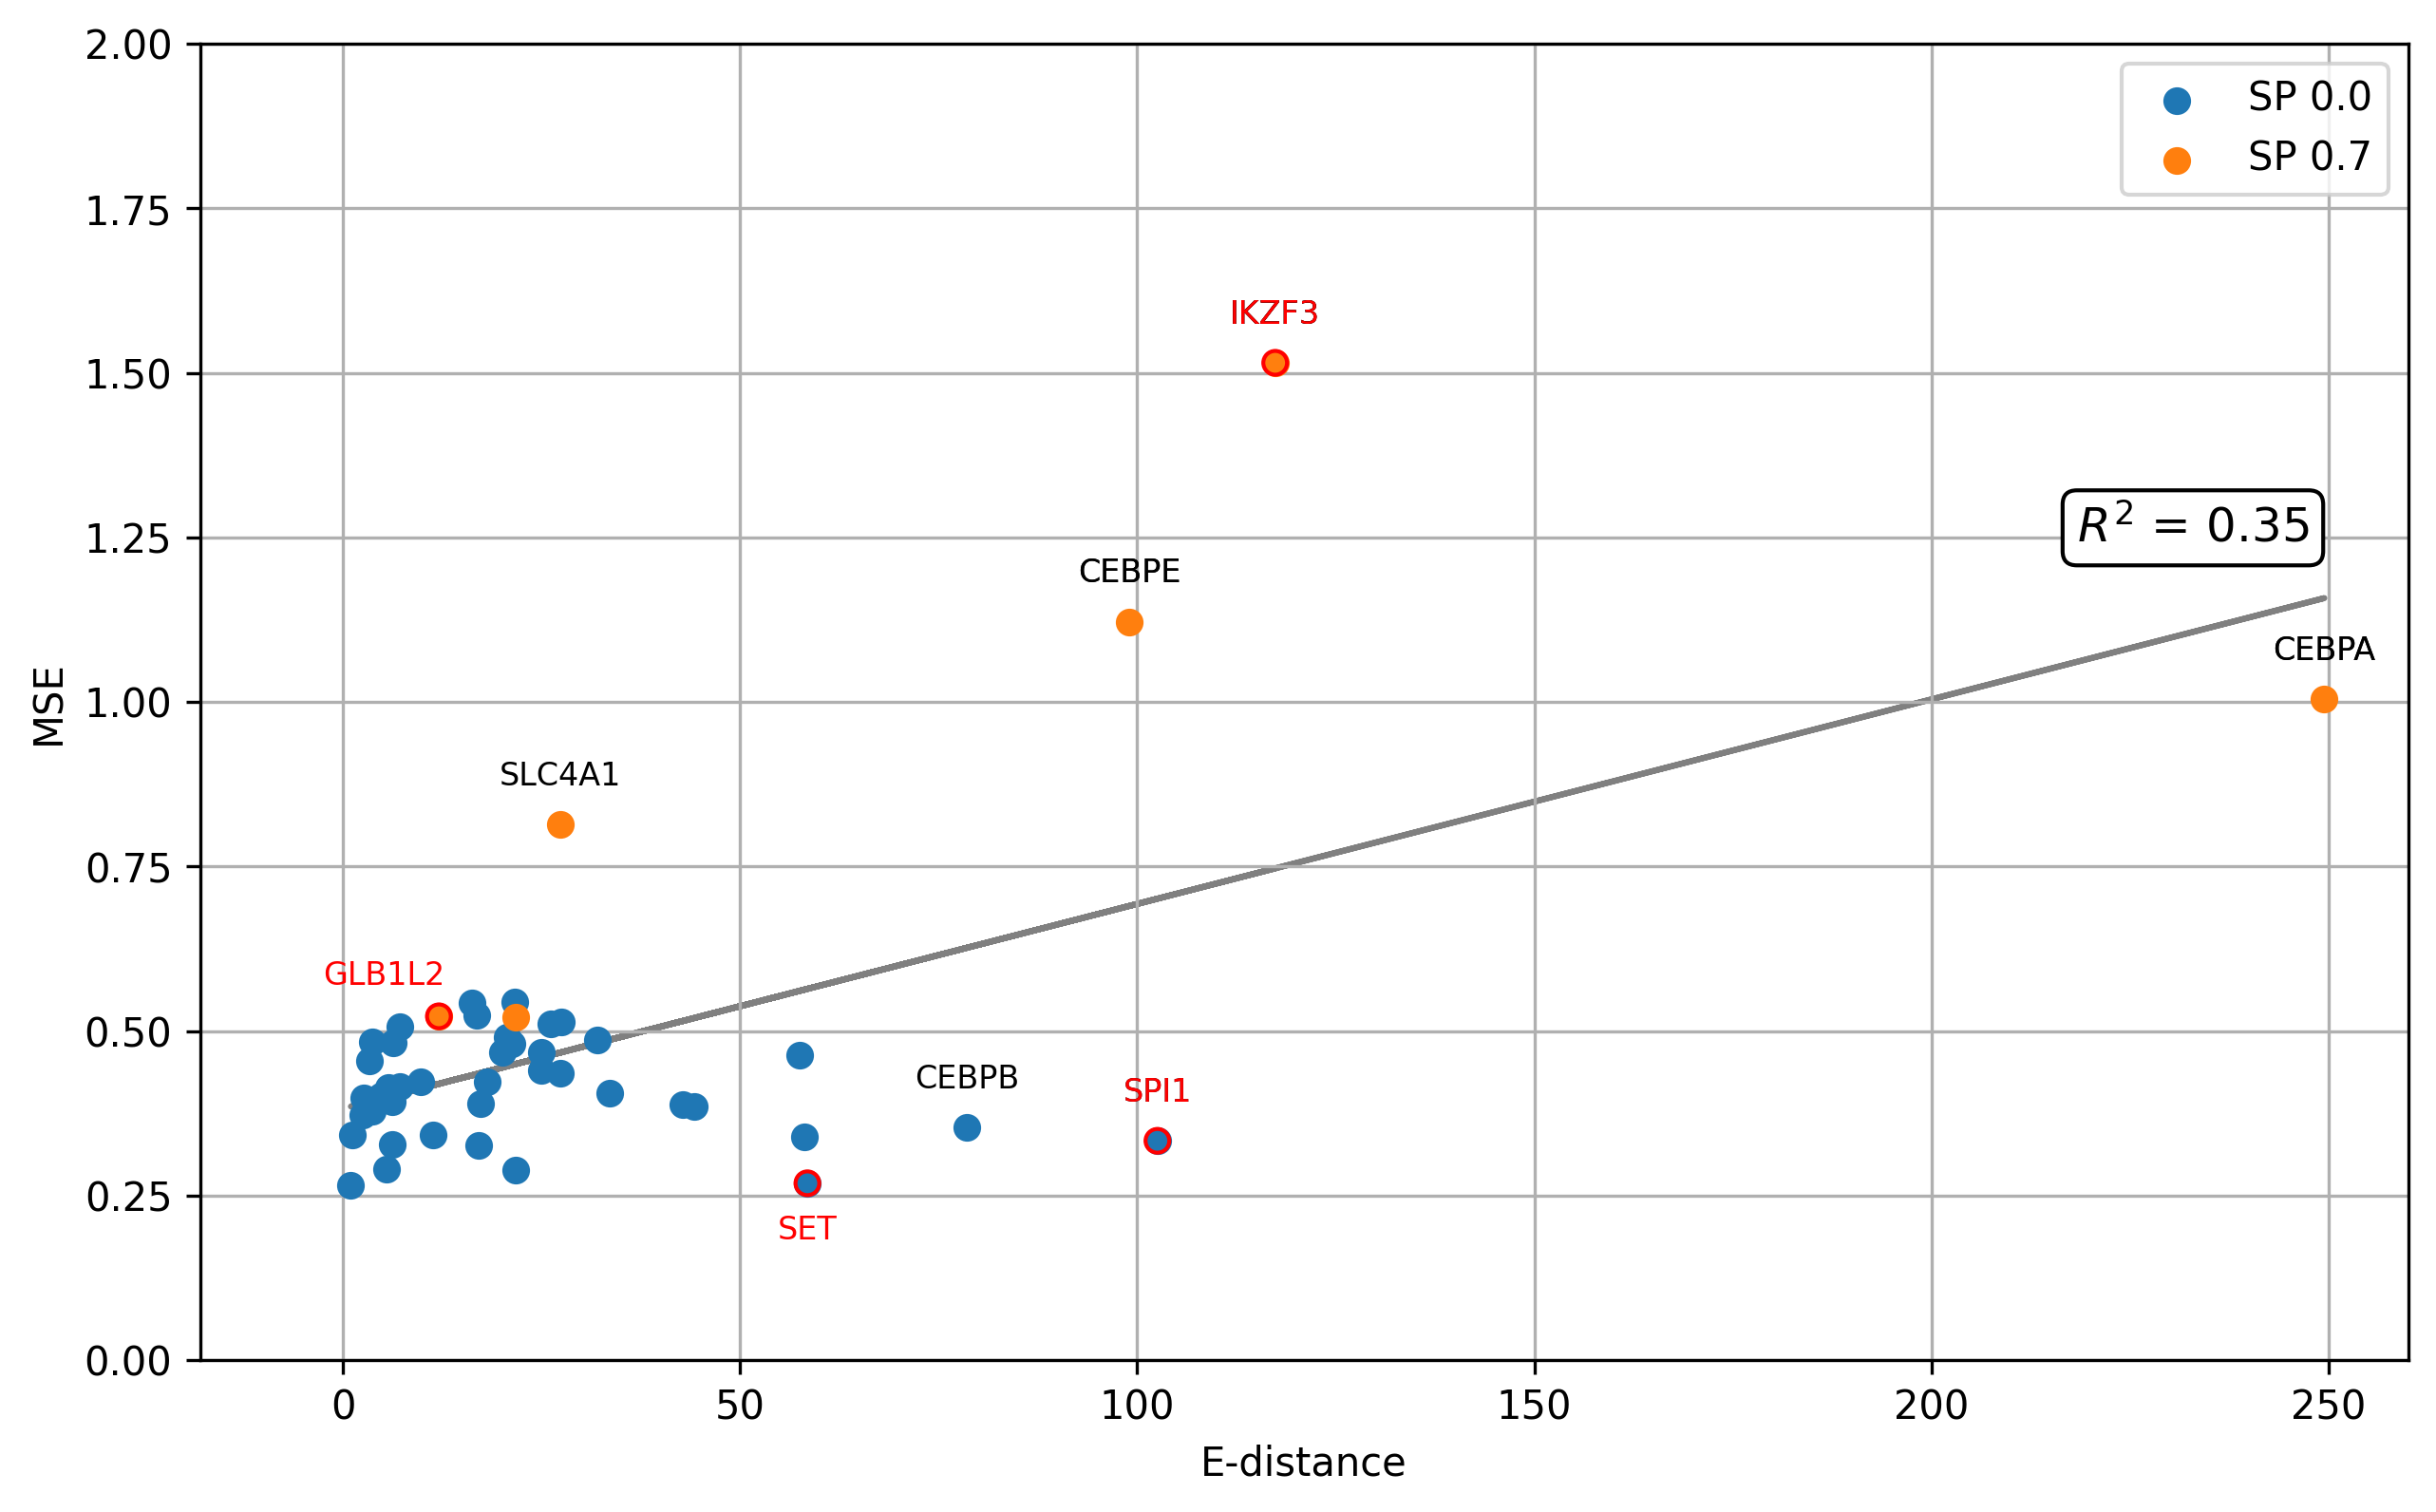

<Figure size 640x480 with 0 Axes>

In [34]:
plt.figure(figsize=(10, 6), dpi=300)

plt.xlabel('E-distance')
plt.ylabel('MSE')
# plt.title('scFMs Test MSE vs E-distance')
plt.grid(True)
plt.ylim(0, 2)
plt.xlim(-18, 260)

if not outliers.empty:
    for _, row in outliers.iterrows():
        if row['perturbation'] != 'IKZF3' or row['perturbation'] != 'SPI1':
            plt.annotate(row['perturbation'], (row['edist'], row['test/mse']),
                         textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8,
                         color='black')
else:
    for _, row in merged_df_scfm.iterrows():
        if row['perturbation'] != 'IKZF3':
            plt.annotate(row['perturbation'], (row['edist'], row['test/mse']),
                         textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8,
                         color='black')

plt.scatter(merged_df_sp0['edist'], merged_df_sp0['test/mse'], color='C0', zorder=2, label='SP 0.0')
plt.scatter(merged_df_sp7['edist'], merged_df_sp7['test/mse'], color='C1', zorder=2, label='SP 0.7')
set_data = merged_df_sp0[merged_df_sp0['perturbation'] == 'SET']
plt.scatter(set_data['edist'], set_data['test/mse'], color='red', zorder=2, facecolor='none')
glb1l2_data = merged_df_sp7[merged_df_sp7['perturbation'] == 'GLB1L2']
plt.scatter(glb1l2_data['edist'], glb1l2_data['test/mse'], color='red', zorder=2, facecolor='none')
ikzf3_data = merged_df_sp7[merged_df_sp7['perturbation'] == 'IKZF3']
plt.scatter(ikzf3_data['edist'], ikzf3_data['test/mse'], color='red', zorder=2, facecolor='none')
spi1_data = merged_df_sp0[merged_df_sp0['perturbation'] == 'SPI1']
plt.scatter(spi1_data['edist'], spi1_data['test/mse'], color='red', zorder=2, facecolor='none')

for _, row in set_data.iterrows():
    plt.annotate(row['perturbation'], (row['edist'], row['test/mse']),
                 textcoords="offset points", xytext=(0, -14), ha='center', fontsize=8, color='red')

for _, row in glb1l2_data.iterrows():
    plt.annotate(row['perturbation'], (row['edist'], row['test/mse']),
                 textcoords="offset points", xytext=(-14, 8), ha='center', fontsize=8, color='red')

for _, row in ikzf3_data.iterrows():
    plt.annotate(row['perturbation'], (row['edist'], row['test/mse']),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red')
    
for _, row in spi1_data.iterrows():
    plt.annotate(row['perturbation'], (row['edist'], row['test/mse']),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red')
    
add_regression_line_and_r2(plt.gca(), merged_df_scfm['edist'], merged_df_scfm['test/mse'])
plt.legend(['SP 0.0', 'SP 0.7'])
plt.savefig('scfm_mse_vs_edist.pdf')
plt.show()
plt.clf()

In [12]:
import scanpy as sc
import matplotlib.pyplot as plt

# Load the .h5ad file
adata = sc.read("../data/norman_2019_raw.h5ad")

In [13]:
# change adata.obs['guide_ids'] to adata.obs['perturbation']
adata.obs['perturbation'] = adata.obs['guide_ids']
adata.obs = adata.obs.drop(columns=['guide_ids'])

In [14]:
# name every '' column to 'ctrl' 
adata.obs['perturbation'] = adata.obs['perturbation'].replace('', 'ctrl')

/var/folders/km/jgnm5nbx7tg_j37y7_0657q00000gn/T/ipykernel_60904/1610021118.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['perturbation'] = adata.obs['perturbation'].replace('', 'ctrl')


## Generate UMAPs

In [15]:
# only keep 'IKZF3' and 'ctrl' perturbations
adata_test = adata[adata.obs['perturbation'].isin(['SPI1', 'ctrl'])]

In [16]:
def create_umap(data, pert_name):
    plt.rcParams['figure.dpi'] = 300    
    data = data[data.obs['perturbation'].isin([pert_name, 'ctrl'])]
    sc.pp.normalize_total(data)
    sc.pp.log1p(data)
    sc.pp.highly_variable_genes(data, n_top_genes=2000)
    data = data[:, data.var.highly_variable]
    
    # Perform PCA
    sc.tl.pca(data, n_comps=50)
    
    # Compute the neighborhood graph
    sc.pp.neighbors(data, n_neighbors=15, n_pcs=50)
    
    # Compute UMAP
    sc.tl.umap(data)
    
    # Plot UMAP
    sc.pl.umap(data, color='perturbation', save=f'_{pert_name}.pdf')

/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


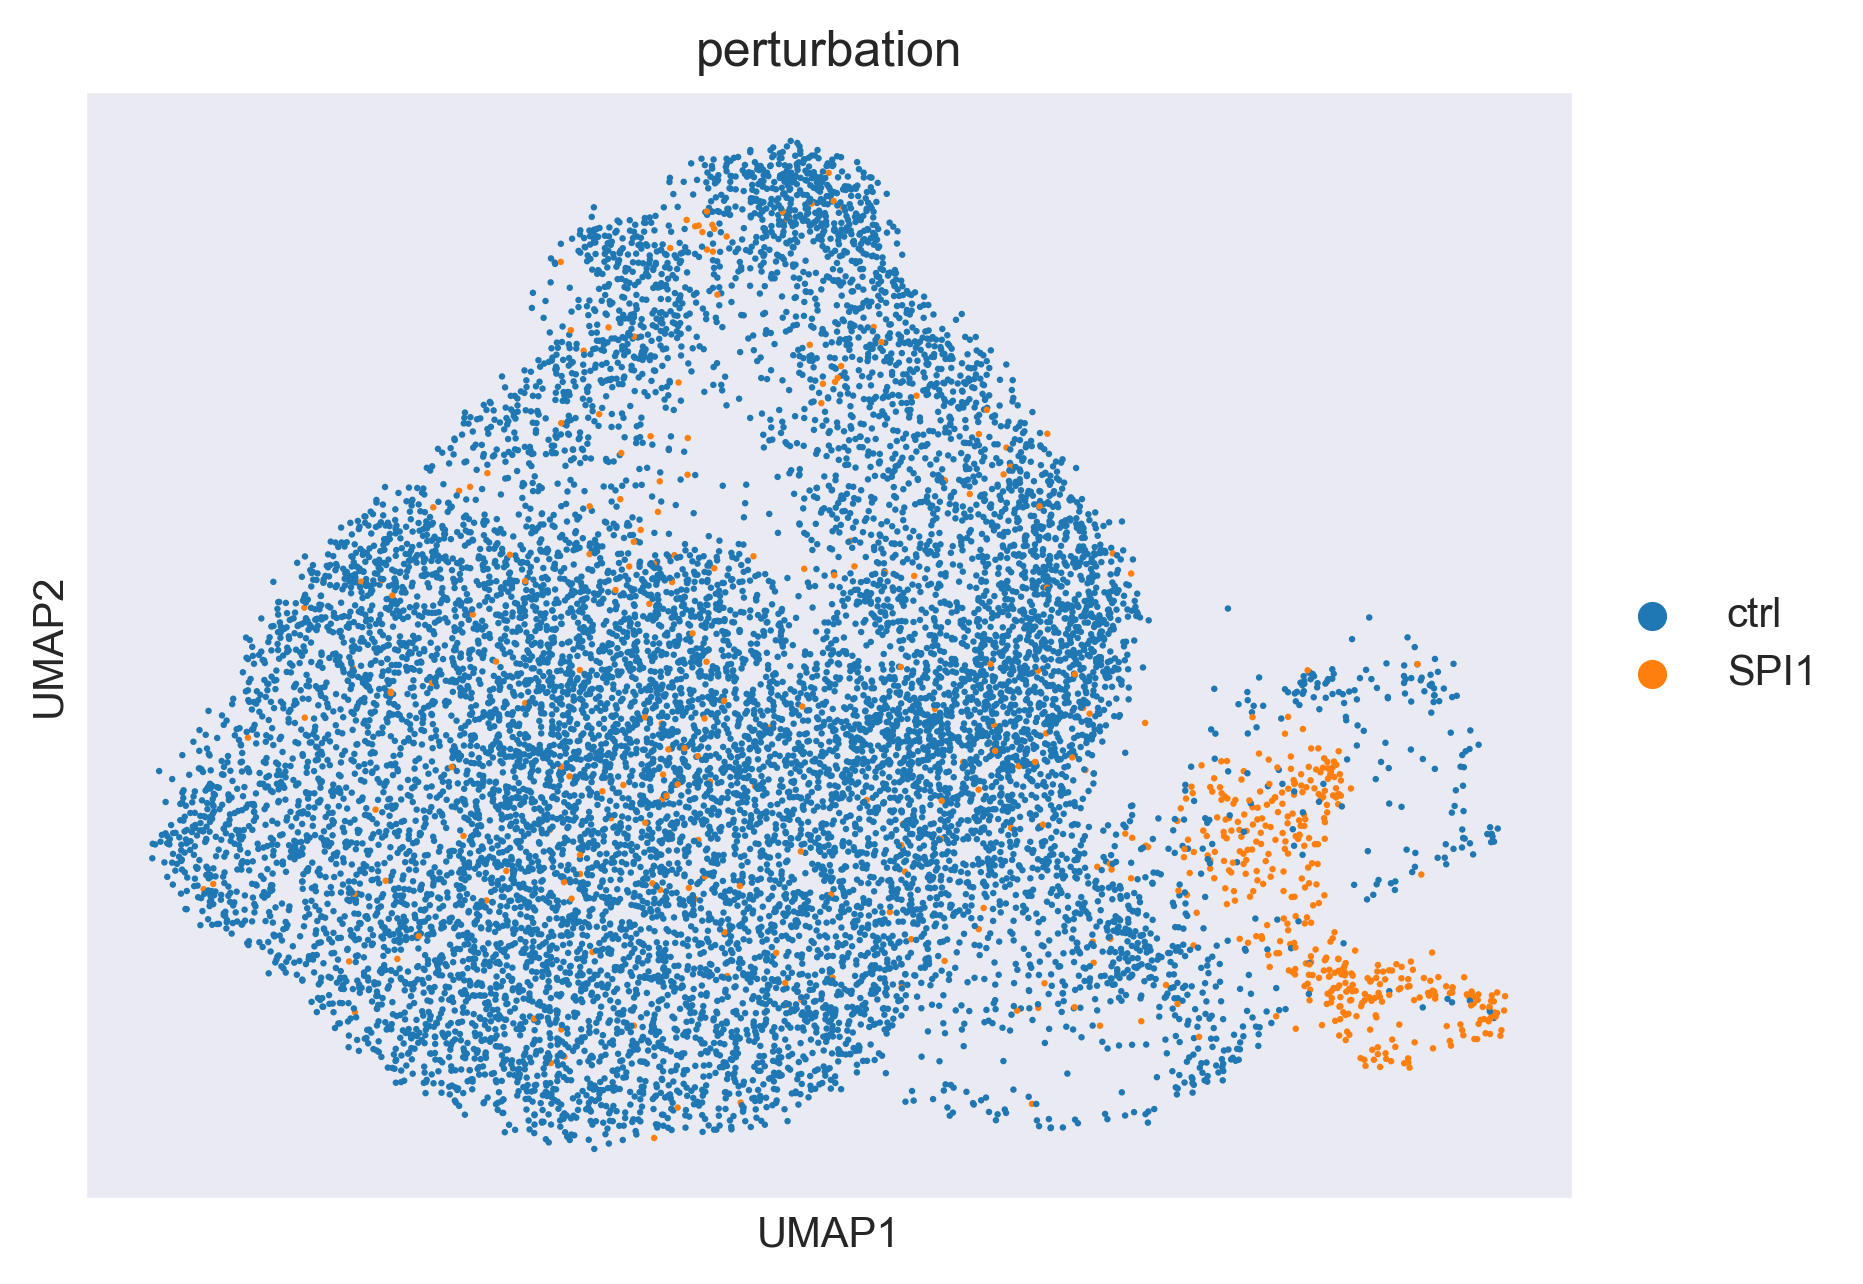

In [17]:
create_umap(adata, 'SPI1')

/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


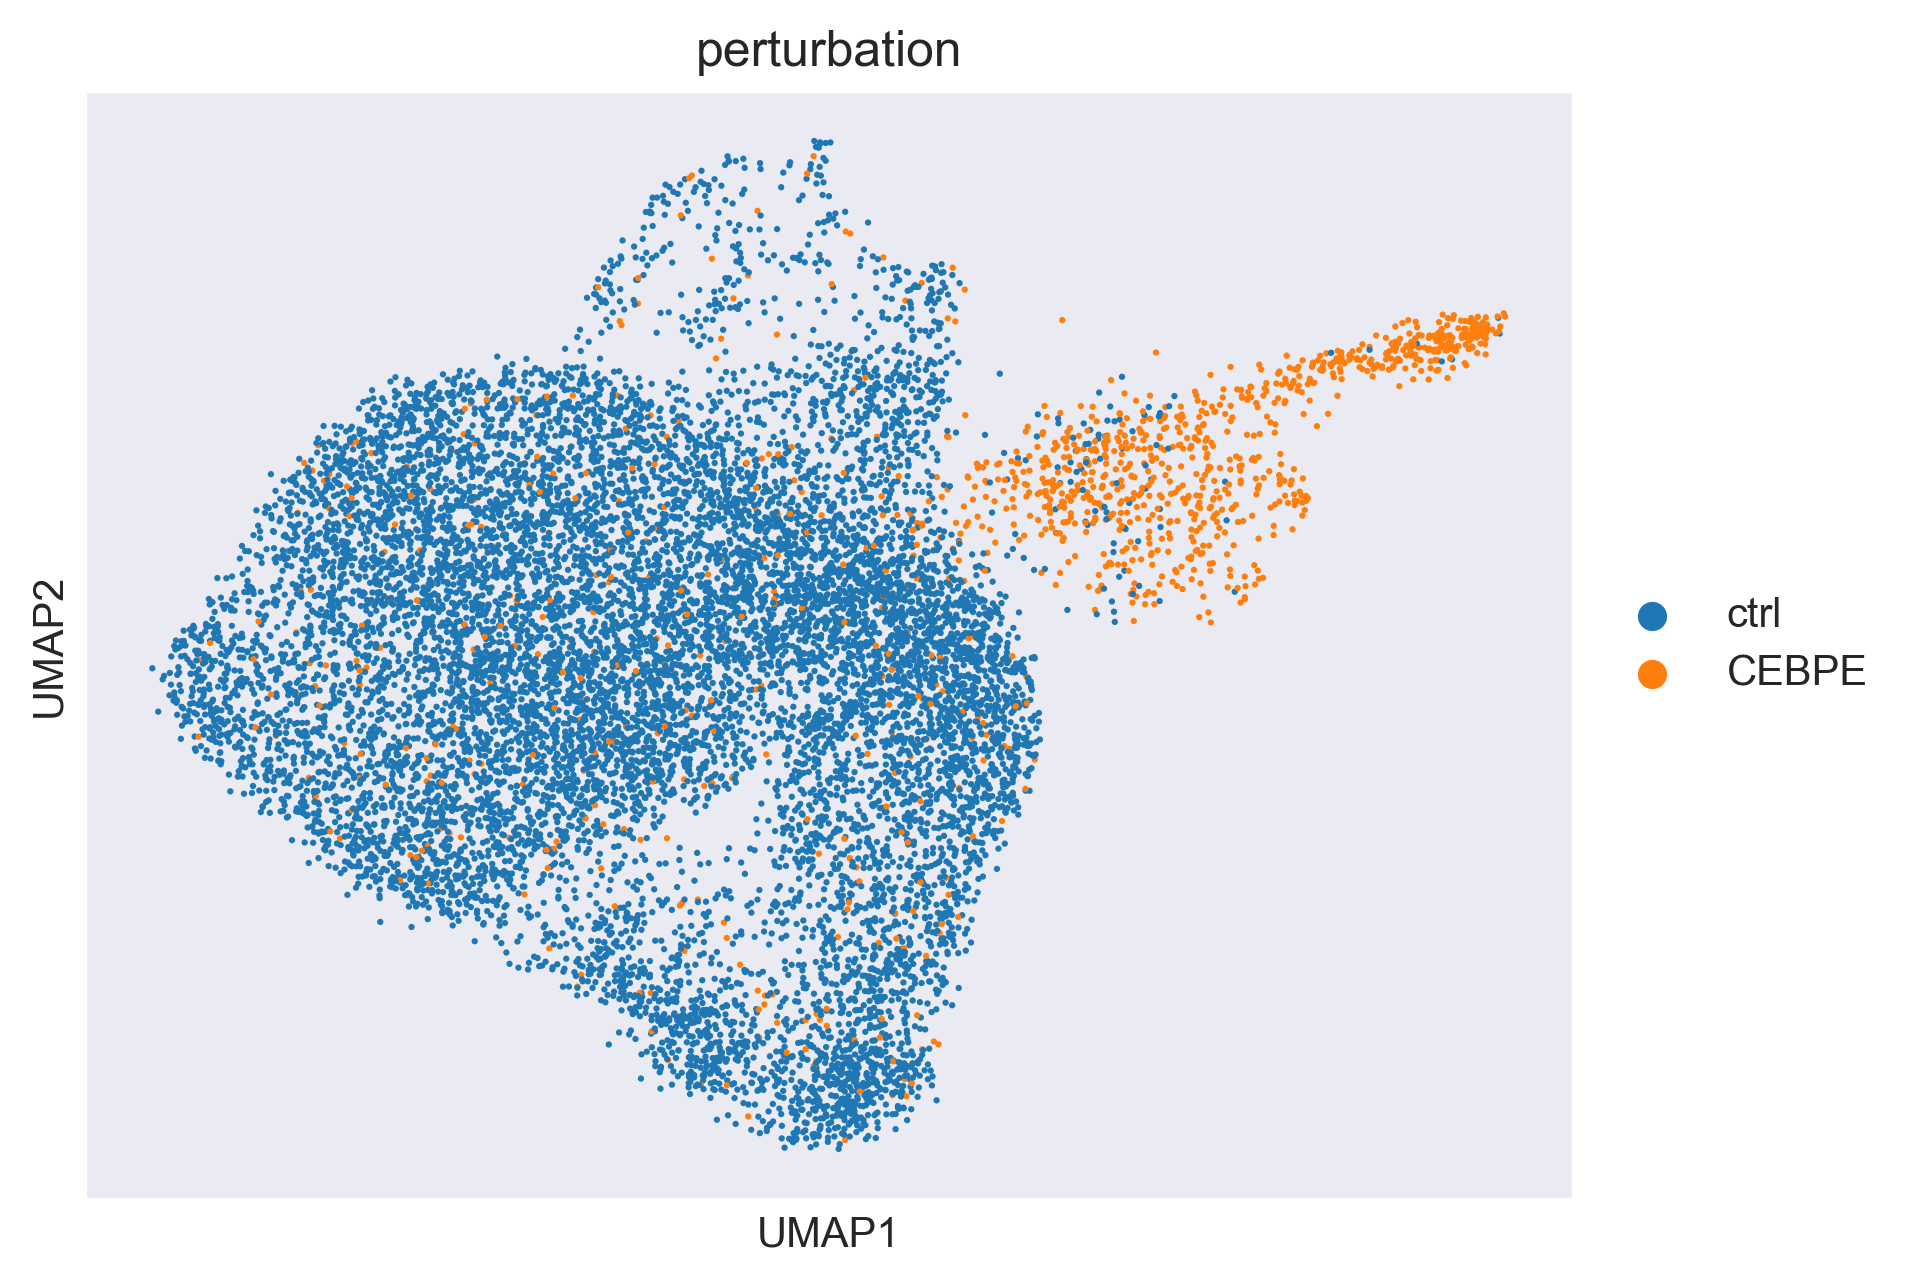

In [25]:
create_umap(adata, 'CEBPE')

/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


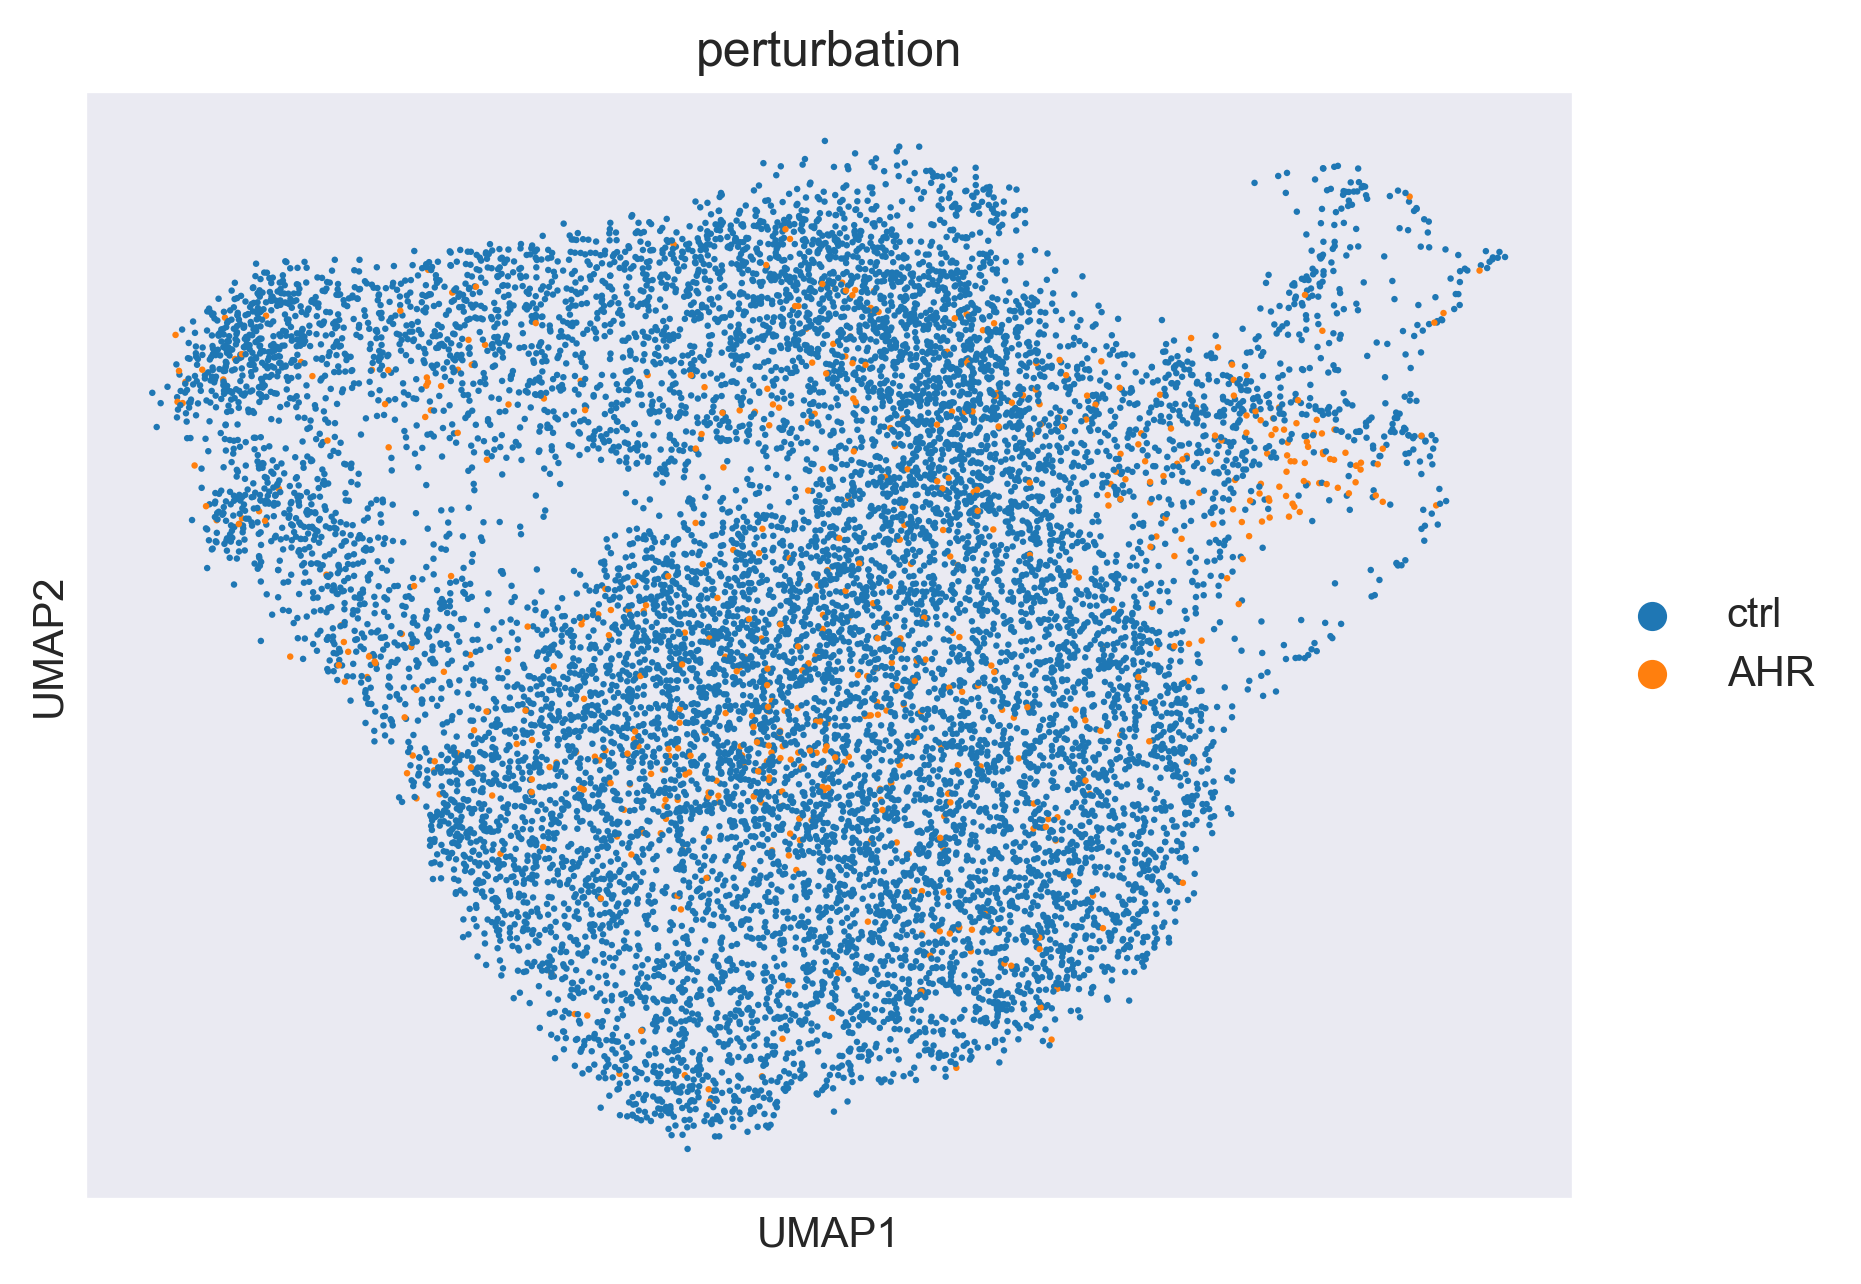

In [26]:
create_umap(adata, 'AHR')

/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


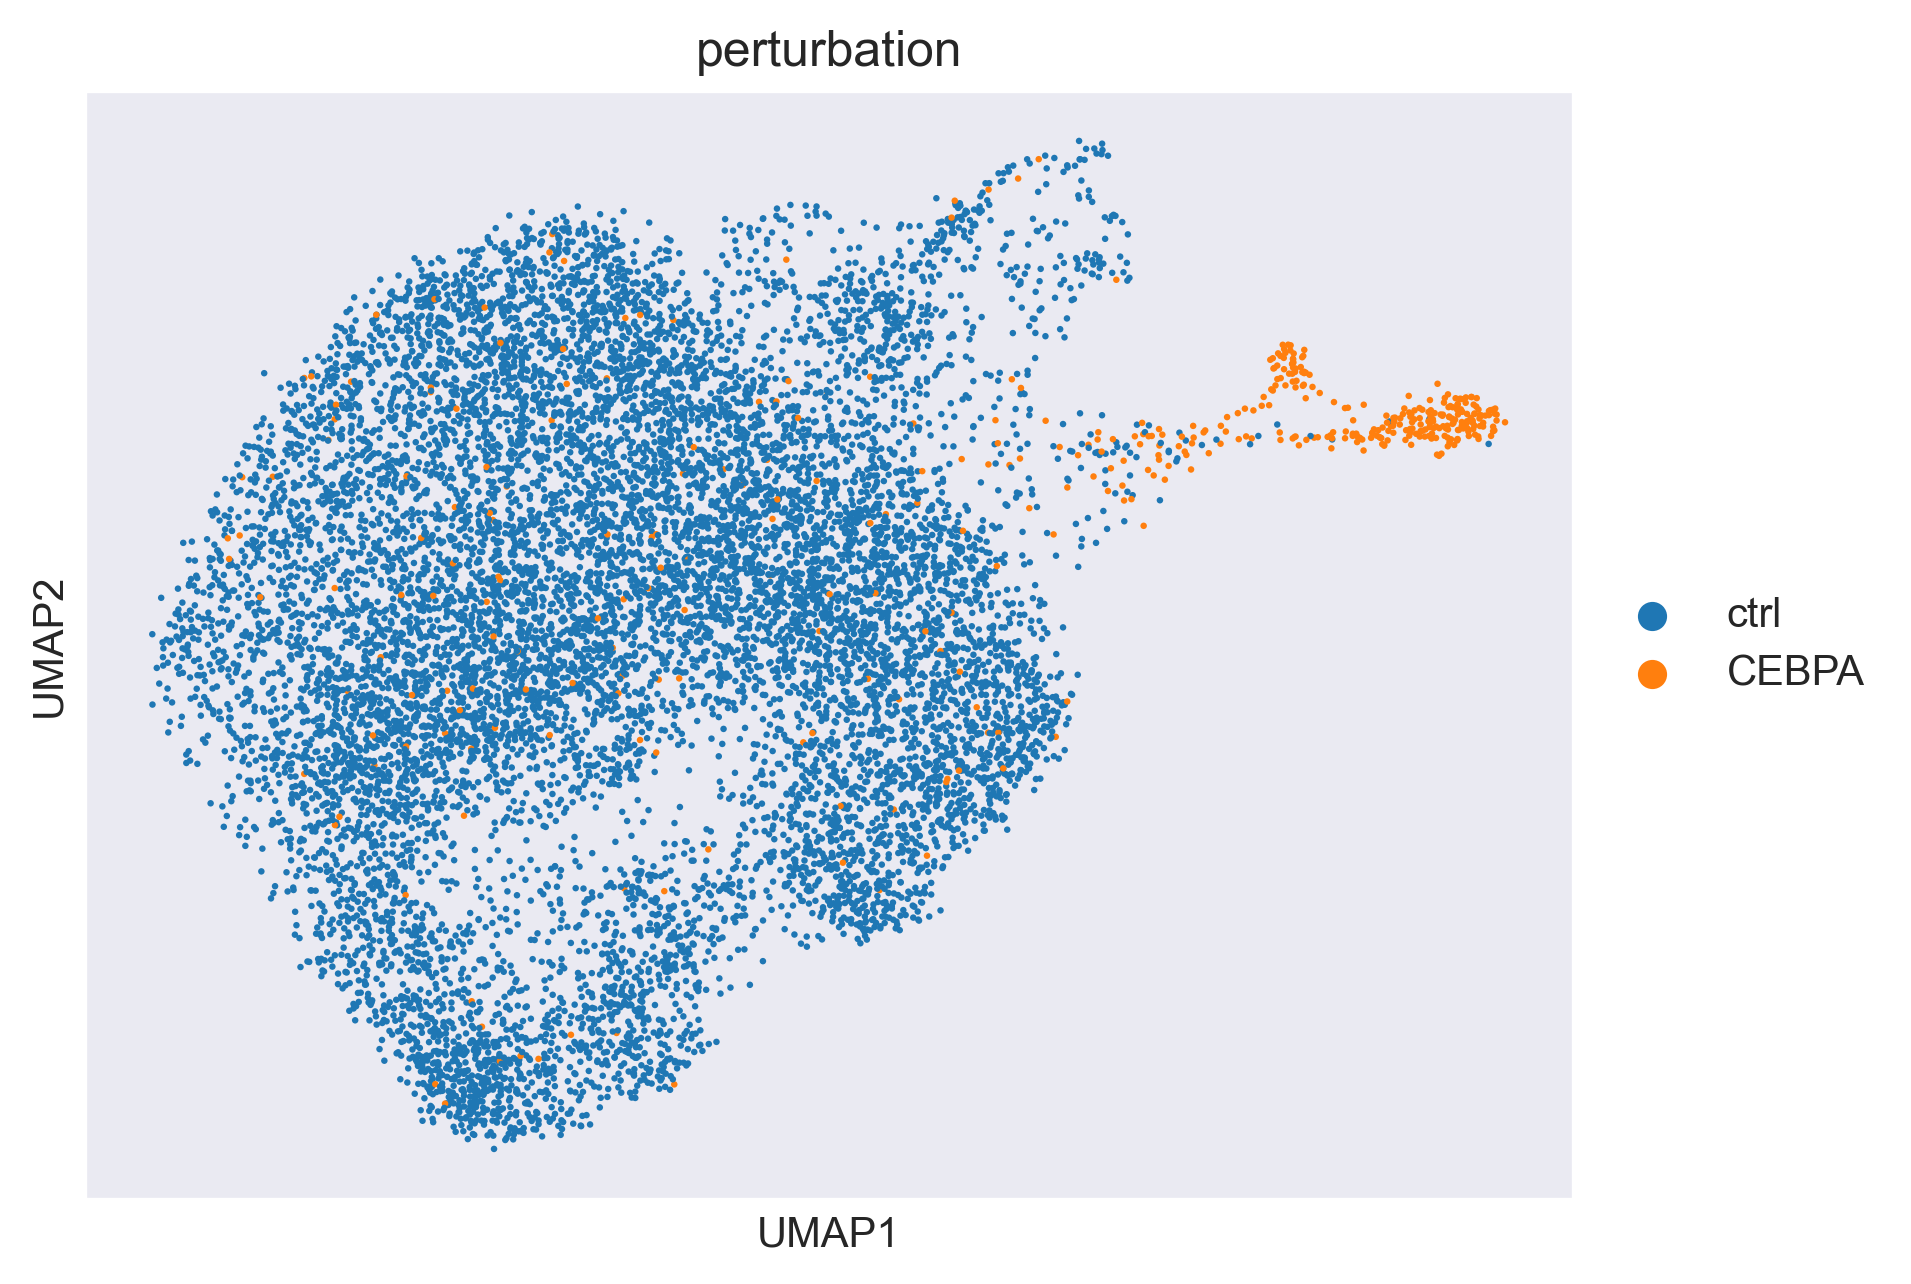

In [27]:
create_umap(adata, 'CEBPA')

/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


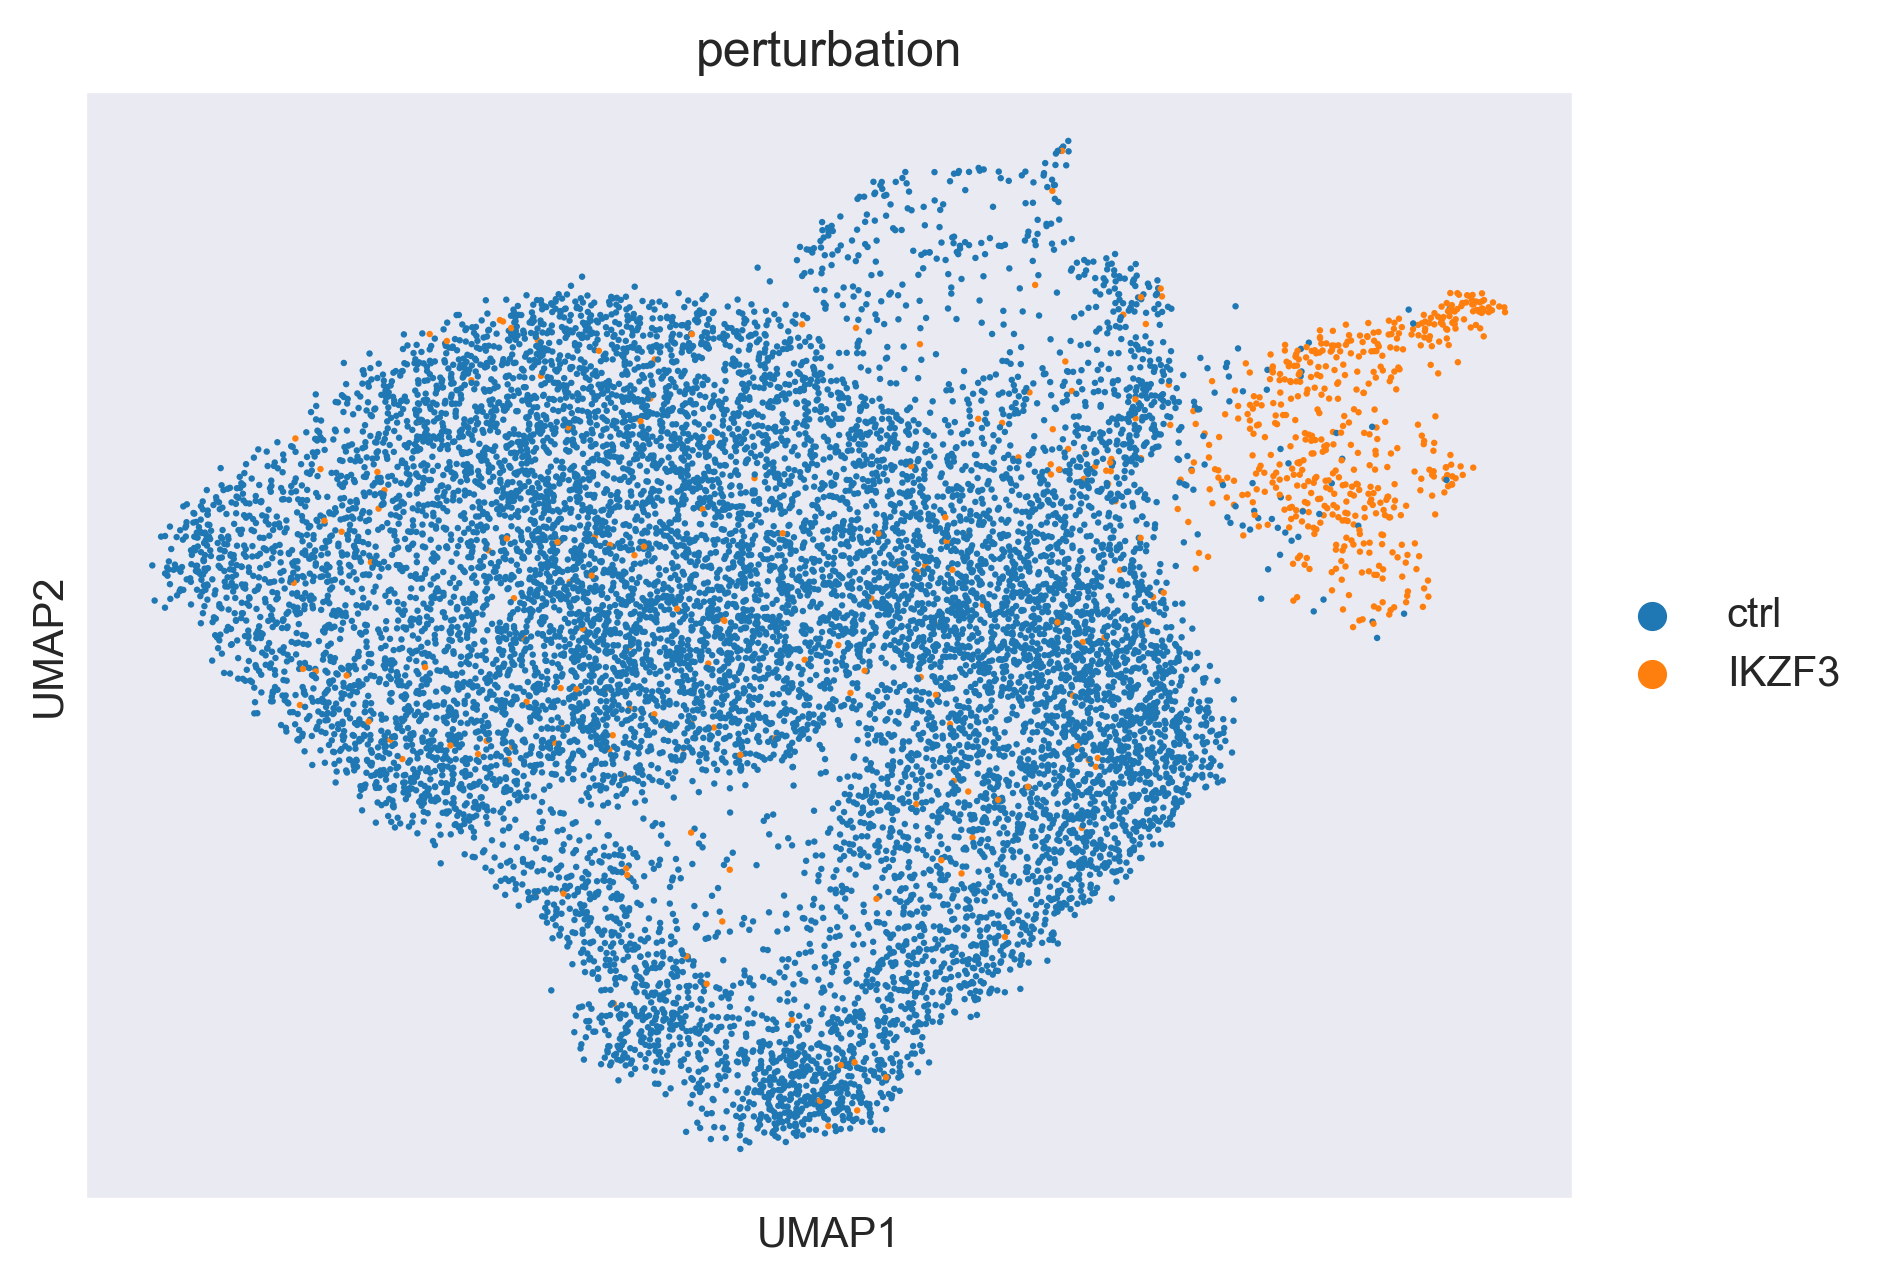

In [28]:
create_umap(adata, 'IKZF3')

/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


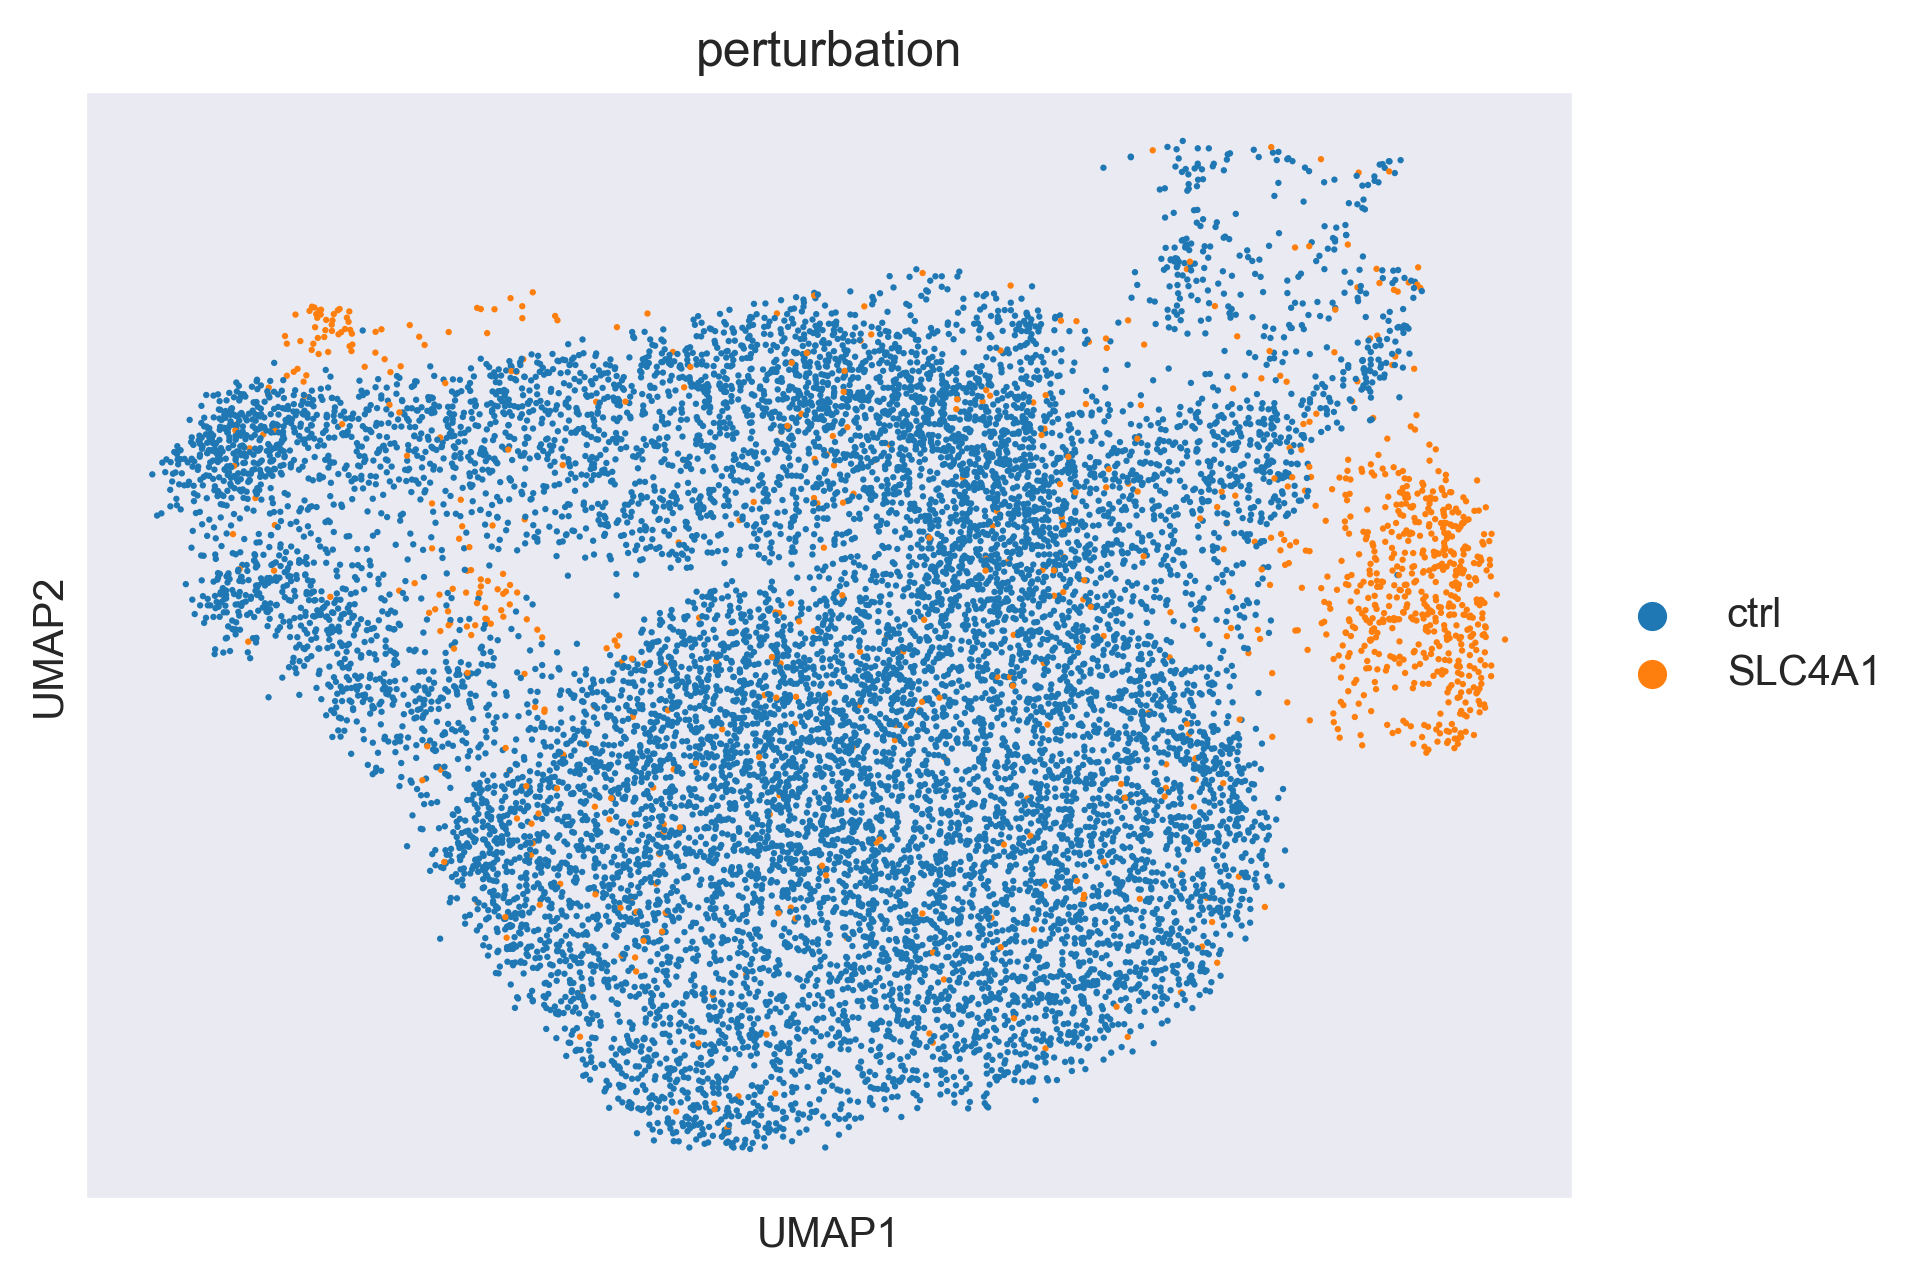

In [29]:
create_umap(adata, 'SLC4A1')

/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


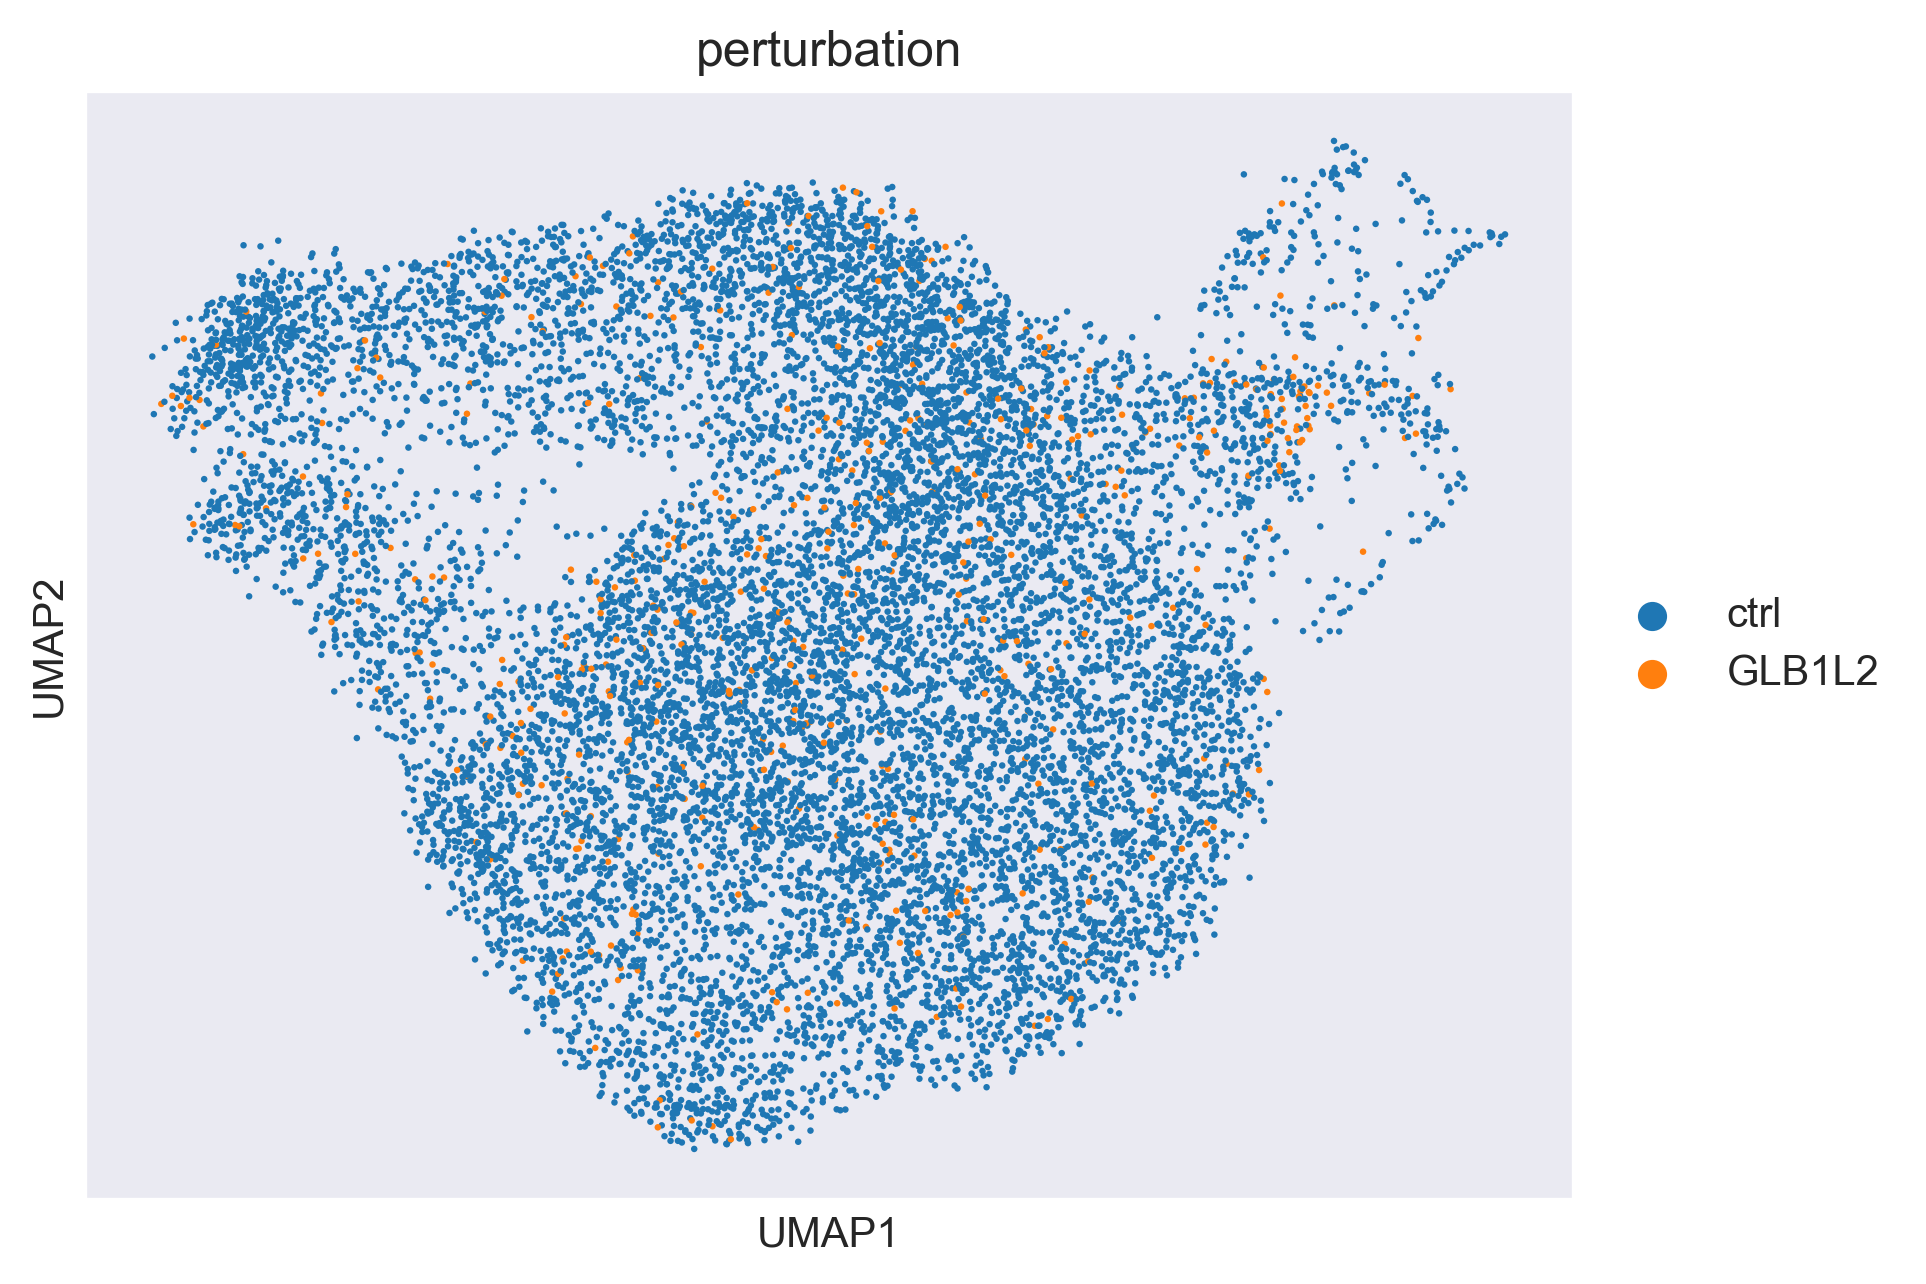

In [30]:
create_umap(adata, 'GLB1L2')

/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:206: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/Users/aaronw/Desktop/PhD/Research/QMUL/Research/scBench/venv/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:314: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm["X_pca"] = X_pca


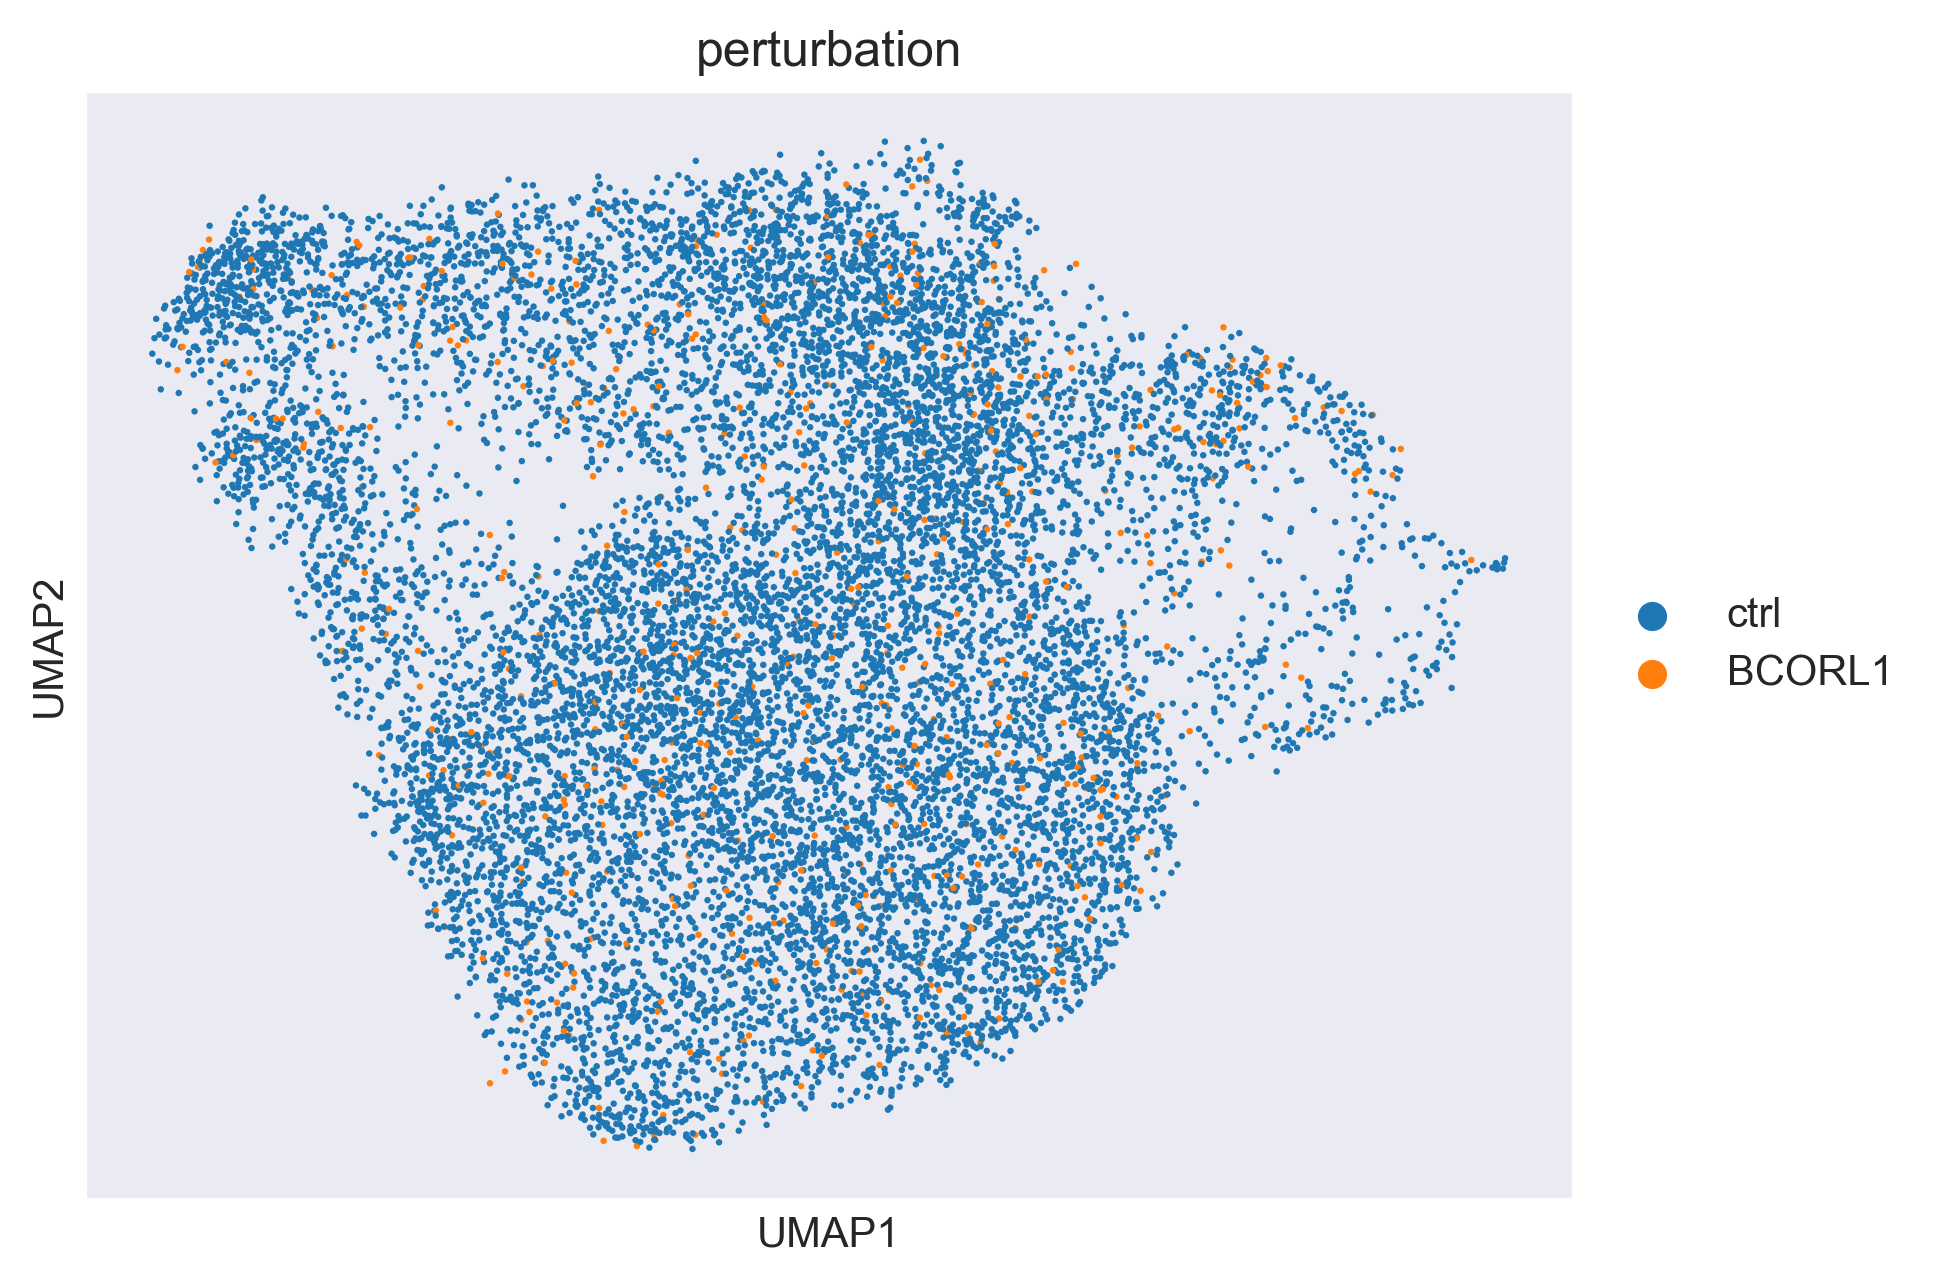

In [31]:
create_umap(adata, 'BCORL1')